# Demo of the L-Wigner Distribution and the Polynomial WV from STFT & SM

### Based on algorithms in Boashash+ 2015 p349 (6.2.17) & p350 (6.2.19) 


In [2]:
using Winston;
using Color;
using PyPlot
import DSP

In [3]:
include("../juwvid.jl")

juwvid

### multi frequency-components data (Boashash+15,p346,Example 6.2.3)

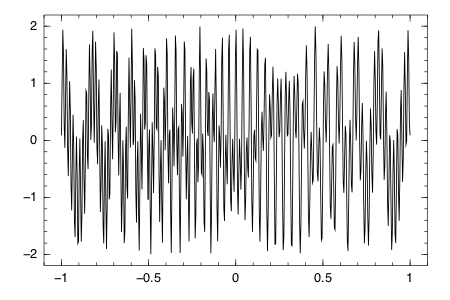

In [4]:
nsample=512
t,x=sampledata.genmultifm623(nsample);
Winston.plot(t,x)

### S-method (constant Lp)

In [5]:
sm=smethod.tfrsm(x,4,NaN,2);

Use fft.


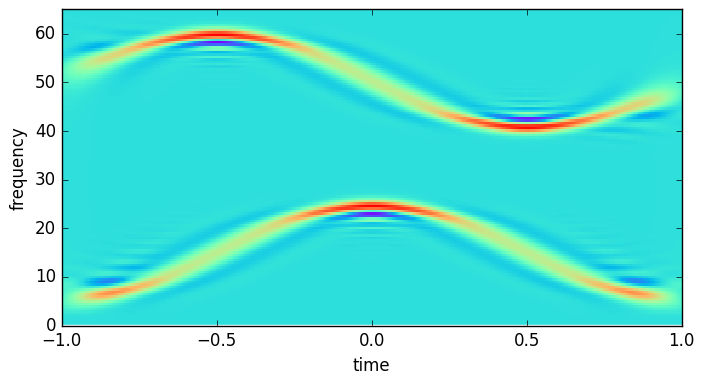

(0,65)

In [6]:
a=juwplot.wtfrshow(sm,t[2]-t[1],t[1],t[end],NaN,NaN,1.0,"rainbow")
PyPlot.xlabel("time")
PyPlot.ylabel("frequency")
PyPlot.ylim(0,65)

### L-Wigner Distribution (L=2)

Use fft.


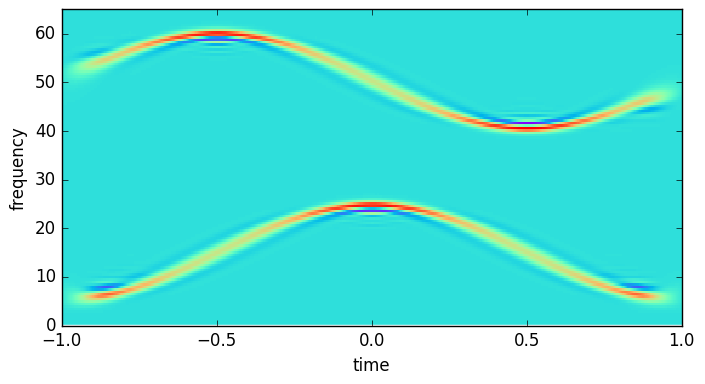

(0,65)

In [7]:
#alias free sm
afwv=smethod.tfrsm(x,4,NaN,2)
#L wigner distribution (L=2)
tfrlw2=lwigner.tfrlw2L(afwv,4);
a=juwplot.wtfrshow(tfrlw2,t[2]-t[1],t[1],t[end],NaN,NaN,1.0,"rainbow")
PyPlot.xlabel("time")
PyPlot.ylabel("frequency")
PyPlot.ylim(0,65)

### polynomial Wigner Ville distribution

Use fft.


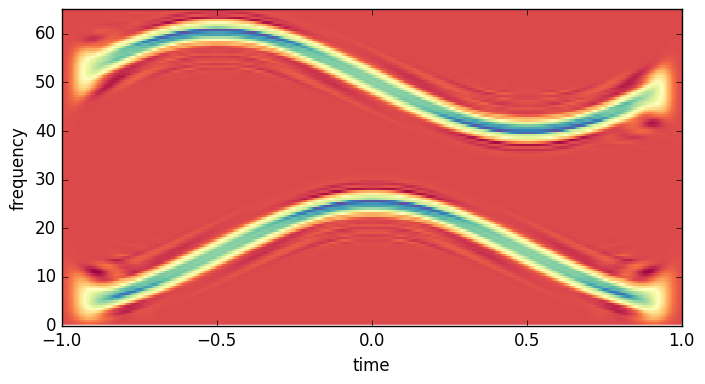

(0,65)

In [13]:
trfpo=polywv.tfrpowv(x,NaN,NaN,NaN,2,8);
a=juwplot.wtfrshow(trfpo,t[2]-t[1],t[1],t[end],NaN,NaN,1.0,"Spectral")
PyPlot.xlabel("time")
PyPlot.ylabel("frequency")
PyPlot.ylim(0,65)

## comparison

In [9]:
tfrst=stft.tfrstft(x);

Use fft.


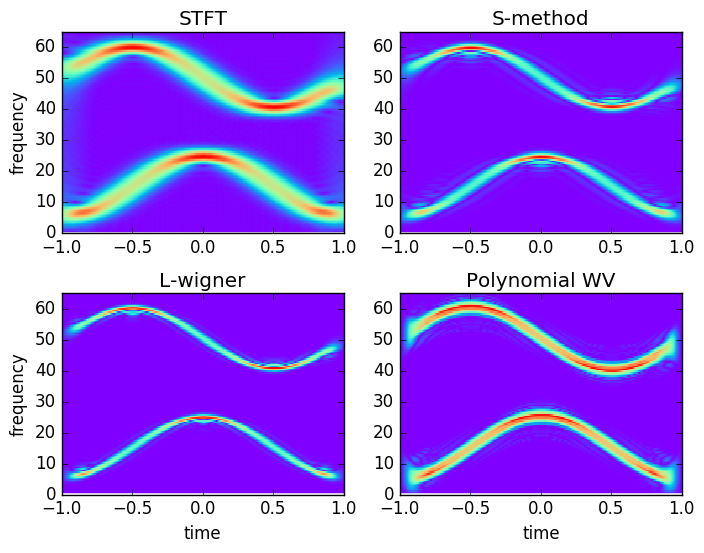

(0,65)

In [14]:
fig=PyPlot.figure()
ax = fig[:add_subplot](2,2,1)
a=juwplot.wtfrshow(abs(tfrst),t[2]-t[1],t[1],t[end],NaN,NaN,0.7*2,"rainbow")
PyPlot.ylabel("frequency")
PyPlot.title("STFT")
PyPlot.ylim(0,65)
ax = fig[:add_subplot](2,2,2)
a=juwplot.wtfrshow(abs(sm),t[2]-t[1],t[1],t[end],NaN,NaN,0.7*2,"rainbow")
PyPlot.title("S-method")
PyPlot.ylim(0,65)
ax = fig[:add_subplot](2,2,3)
a=juwplot.wtfrshow(abs(tfrlw2),t[2]-t[1],t[1],t[end],NaN,NaN,0.7*2,"rainbow")
PyPlot.xlabel("time")
PyPlot.ylabel("frequency")
PyPlot.title("L-wigner")
PyPlot.ylim(0,65)
ax = fig[:add_subplot](2,2,4)
a=juwplot.wtfrshow(abs(trfpo),t[2]-t[1],t[1],t[end],NaN,NaN,0.7*2,"rainbow")
PyPlot.xlabel("time")
PyPlot.title("Polynomial WV")
PyPlot.ylim(0,65)

## Comparison (noisy case)

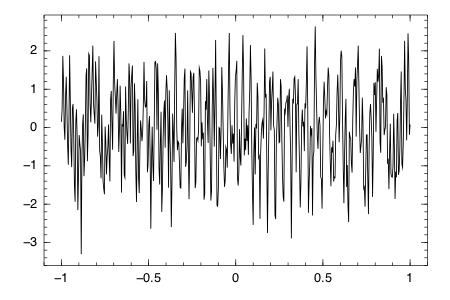

In [16]:
using Distributions
d = Normal()
xnoise=x+rand(d,nsample)*std(x)*0.5
Winston.plot(t,xnoise)

In [19]:
tfrst=stft.tfrstft(xnoise);
#alias free sm
sm=smethod.tfrsm(xnoise,4,NaN,2)
#L wigner distribution (L=2)
tfrlw2=lwigner.tfrlw2L(sm,4);
trfpo=polywv.tfrpowv(xnoise,NaN,NaN,NaN,2,8);

Use fft.
Use fft.
Use fft.


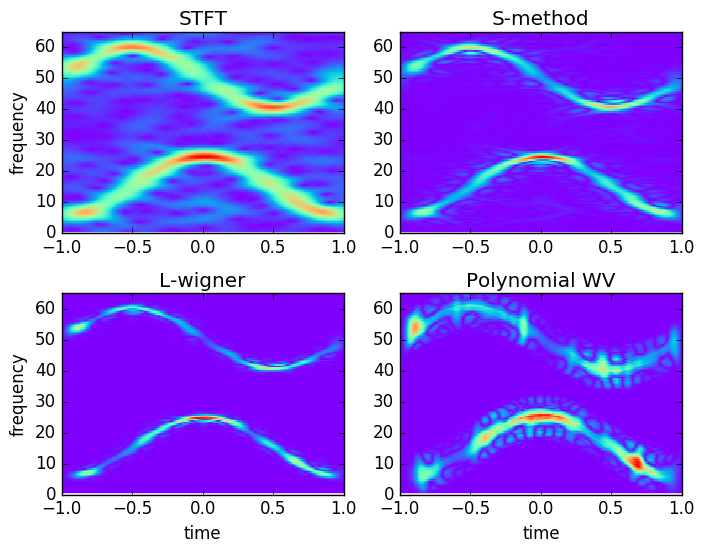

(0,65)

In [20]:
fig=PyPlot.figure()
ax = fig[:add_subplot](2,2,1)
a=juwplot.wtfrshow(abs(tfrst),t[2]-t[1],t[1],t[end],NaN,NaN,0.7*2,"rainbow")
PyPlot.ylabel("frequency")
PyPlot.title("STFT")
PyPlot.ylim(0,65)
ax = fig[:add_subplot](2,2,2)
a=juwplot.wtfrshow(abs(sm),t[2]-t[1],t[1],t[end],NaN,NaN,0.7*2,"rainbow")
PyPlot.title("S-method")
PyPlot.ylim(0,65)
ax = fig[:add_subplot](2,2,3)
a=juwplot.wtfrshow(abs(tfrlw2),t[2]-t[1],t[1],t[end],NaN,NaN,0.7*2,"rainbow")
PyPlot.xlabel("time")
PyPlot.ylabel("frequency")
PyPlot.title("L-wigner")
PyPlot.ylim(0,65)
ax = fig[:add_subplot](2,2,4)
a=juwplot.wtfrshow(abs(trfpo),t[2]-t[1],t[1],t[end],NaN,NaN,0.7*2,"rainbow")
PyPlot.xlabel("time")
PyPlot.title("Polynomial WV")
PyPlot.ylim(0,65)